In [ ]:
#The score on training and validation sets are very similar and hence there should be no overfitting. If the score on the training set is much lower than that of the validation set, the data may be overfit

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# up_df = pd.read_pickle('df_new_ver5_20190401.pickle')

In [ ]:
# up_df.head()

In [ ]:

# up_df_thurs = up_df.loc['2017-01-05']+up_df.loc['2017-01-12']+up_df.loc['2017-01-19']+up_df.loc['2017-01-26']+up_df.loc['2017-02-02']+up_df.loc['2017-02-09']+up_df.loc['2017-02-16']+up_df.loc['2017-02-23']+up_df.loc['2017-03-02']+up_df.loc['2017-03-09']+up_df.loc['2017-03-16']+up_df.loc['2017-03-23']+up_df.loc['2017-03-30']+up_df.loc['2017-04-06']+up_df.loc['2017-04-13']+up_df.loc['2017-04-20']+up_df.loc['2017-04-27']+up_df.loc['2017-05-04']+up_df.loc['2017-05-11']+up_df.loc['2017-05-18']+up_df.loc['2017-05-25']+up_df.loc['2017-06-01']+up_df.loc['2017-06-08']+up_df.loc['2017-06-15']+up_df.loc['2017-06-22']+up_df.loc['2017-06-29']+up_df.loc['2017-07-06']+up_df.loc['2017-07-13']+up_df.loc['2017-07-20']+up_df.loc['2017-07-27']+up_df.loc['2017-08-03']+up_df.loc['2017-08-10']+up_df.loc['2017-08-17']+up_df.loc['2017-08-24']+up_df.loc['2017-08-31']+up_df.loc['2017-09-07']+up_df.loc['2017-09-14']+up_df.loc['2017-09-21']+up_df.loc['2017-09-28']

# up_df_thurs.size

In [ ]:
# # Filter out all Thursdays in 2017
# up_df = up_df.reset_index()

# up_df_thurs = up_df[up_df['Timestamp'].dt.weekday == 3]
# up_df_thurs = up_df_thurs[up_df_thurs['Timestamp'].dt.year == 2017]
# up_df_thurs = up_df_thurs[up_df_thurs['Timestamp'].dt.month < 10]

In [ ]:
# up_df_thurs.tail()

In [ ]:
# up_df_thurs.to_csv('All_Months_2017.csv')

In [2]:
up_df_thurs = pd.read_csv('All_Months_2017.csv')

In [3]:
# up_df_thurs.head()

In [3]:
date_df = pd.DataFrame({'TimeStamp':up_df_thurs['Timestamp']})

In [4]:
time_only = pd.DatetimeIndex(up_df_thurs['Timestamp']).time
latency = up_df_thurs['5ma_latency']

new_df = pd.DataFrame({'Time':time_only,'Latency':latency})
new_df.drop(new_df[(new_df['Latency']>1300)].index,inplace=True)

new_time = (new_df['Time'].to_list())
new_latency = (new_df['Latency'].to_list())

# Convert time to time in hours.

time_in_hours = []
for i in range(len(new_time)):
    temp = new_time[i].hour + new_time[i].minute/60
    time_in_hours.append(temp)

In [5]:
df_test = new_df
new_df.drop(columns=['Time'],inplace=True)
new_df['Time'] = time_in_hours
new_df.head()

,Latency,Time
0,733.986486,6.000000
1,740.000000,6.016667
2,761.130435,6.033333
3,756.410256,6.050000
4,726.880000,6.066667


In [6]:
date_df['Latency'] = latency

In [7]:
date_df.head()

,TimeStamp,Latency
0,2017-01-05 06:00:00,733.986486
1,2017-01-05 06:01:00,740.000000
2,2017-01-05 06:02:00,761.130435
3,2017-01-05 06:03:00,756.410256
4,2017-01-05 06:04:00,726.880000


In [8]:
date_df['TimeStamp'] = pd.to_datetime(date_df['TimeStamp'])

In [9]:
data1 = date_df.set_index('TimeStamp').resample('5min')['Latency'].mean()

time_only = pd.DatetimeIndex(data1.index).time

# Since the above plot has a lot of noise with latency values greater than a certain threshold (~1500), any latency values greater than 1500 sohuld be removed. 

# Convert the lists into a dataframe to filter out rows which have latency values > 1500.
new_df = pd.DataFrame({'Time':time_only,'Latency':data1})

new_df.drop(new_df[(new_df['Latency']>1300)].index,inplace=True)

# Convert the new dataframe with latencies < 1500 into a list for plotting.

new_time = (new_df['Time'].to_list())
new_latency = (new_df['Latency'].to_list())

# Convert time to time in hours.

time_in_hours = []
for i in range(len(new_time)):
    temp = new_time[i].hour + new_time[i].minute/60
    time_in_hours.append(temp)

In [10]:
data1.head()

TimeStamp
2017-01-05 06:00:00    743.681436
2017-01-05 06:05:00    736.329401
2017-01-05 06:10:00    774.373180
2017-01-05 06:15:00    927.095984
2017-01-05 06:20:00    958.002804
Freq: 5T, Name: Latency, dtype: float64

In [11]:
data1 = data1.reset_index()

In [12]:
data1.head()

,TimeStamp,Latency
0,2017-01-05 06:00:00,743.681436
1,2017-01-05 06:05:00,736.329401
2,2017-01-05 06:10:00,774.373180
3,2017-01-05 06:15:00,927.095984
4,2017-01-05 06:20:00,958.002804


In [15]:
# Since the data is too large for GPR, shrink it by taking the average latencies over every 5 minutes.

# df_test = new_df.rolling(5).mean() 
# df_test = df_test.iloc[::5, :]
# df_test['Time'].size

In [13]:
new_df = data1

new_df.head()

,TimeStamp,Latency
0,2017-01-05 06:00:00,743.681436
1,2017-01-05 06:05:00,736.329401
2,2017-01-05 06:10:00,774.373180
3,2017-01-05 06:15:00,927.095984
4,2017-01-05 06:20:00,958.002804


In [14]:
new_df.drop(new_df[(new_df['Latency']>1300)].index,inplace=True)

# Convert the new dataframe with latencies < 1500 into a list for plotting.

new_time = (new_df['TimeStamp'].dt.time.to_list())
new_latency = (new_df['Latency'].to_list())

# Convert time to time in hours.

time_in_hours = []
for i in range(len(new_time)):
    temp = new_time[i].hour + new_time[i].minute/60
    time_in_hours.append(temp)

# df_test = new_df
# new_df.drop(columns=['Time'],inplace=True)
new_df['Time'] = time_in_hours
# new_df.head()




In [15]:
new_df['TimeStamp'] = pd.to_datetime(new_df['TimeStamp'])

In [16]:

# new_df = new_df[(new_df['TimeStamp'] >= '2017-01-01 06:00:00') & (new_df['TimeStamp'] <= '2017-09-01 22:00:00')]


In [17]:
new_df.drop('TimeStamp', axis=1, inplace=True)

In [18]:
new_df.dropna(inplace=True)

In [19]:
# Split the data into training and testing datasets
from sklearn.model_selection import train_test_split

features = new_df.drop('Latency',axis=1) # drop labels for training set
labels = new_df["Latency"].copy()

# Use test size as 0.1, because the total dataset is not very large (91684). Therefore, to increase the model's performance, as much data should be used to train the model as possible.

X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.2,random_state=41)

X_train.shape

(5508, 1)

In [20]:
y_train.shape

(5508,)

In [56]:
# # Split the data into training and testing datasets
# from sklearn.model_selection import train_test_split

# features = df_test.drop("Latency", axis=1) # drop labels for training set
# labels = df_test["Latency"].copy()

# # Use test size as 0.1, because the total dataset is not very large (91684). Therefore, to increase the model's performance, as much data should be used to train the model as possible.

# X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.2,random_state=41)

# X_train.shape

In [74]:
# # X_train does NOT have any null values
# # X_train.isnull().values.any()

# # y_train HAS null values. Therefore, need fixing.
# # y_train.isnull().values.any()

# # y_train.fillna(method='ffill',inplace=True)
# y_train.dropna(inplace=True)
# y_train.isnull().values.any()

# # X_train.fillna(method='ffill',inplace=True)
# X_train.dropna(inplace=True)
# X_train.isnull().values.any()

In [60]:
# # Gaussian Process Regressor

# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# # Instantiate a Gaussian Process model
# kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
# gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# # Fit to data using Maximum Likelihood Estimation of the parameters
# gp.fit(X_train, y_train)

# # Make the prediction on the meshed x-axis (ask for MSE as well)
# y_pred, sigma = gp.predict(X_test, return_std=True)

# # Plot the function, the prediction and the 95% confidence interval based on
# # the MSE
# # plt.figure()
# # plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
# # plt.plot(X, y, 'r.', markersize=10, label='Observations')
# # plt.plot(x, y_pred, 'b-', label='Prediction')
# # plt.fill(np.concatenate([x, x[::-1]]),
# #          np.concatenate([y_pred - 1.9600 * sigma,
# #                         (y_pred + 1.9600 * sigma)[::-1]]),
# #          alpha=.5, fc='b', ec='None', label='95% confidence interval')
# # plt.xlabel('$x$')
# # plt.ylabel('$f(x)$')
# # plt.ylim(-10, 20)
# # plt.legend(loc='upper left')


In [21]:
from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# rbf = C(1.0) * RBF(length_scale=1.0)
# clf = GaussianProcessRegressor(kernel=rbf, random_state=41)

# Best fit when using the default RBF kernel
clf = GaussianProcessRegressor(random_state=41)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


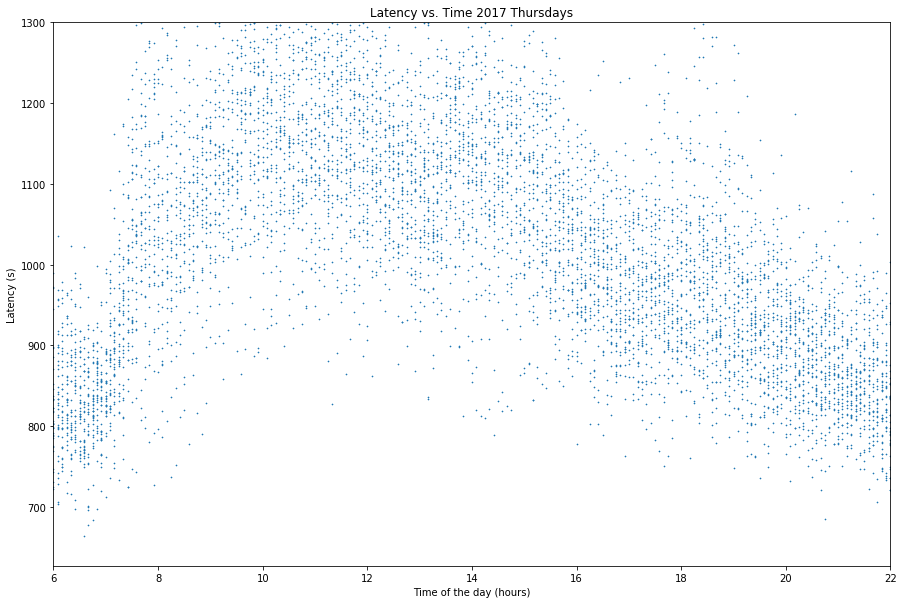

In [22]:
# The latency data represents 5_ma_latency.

plt.figure(figsize=(15,10))
plt.scatter(time_in_hours, new_latency, marker = 'x', s=0.5)
plt.title('Latency vs. Time 2017 Thursdays')
plt.xlabel('Time of the day (hours)')
plt.ylabel('Latency (s)')
plt.xlim(xmin=6)
plt.xlim(xmax=22)
plt.ylim(ymax=1300)
plt.show()

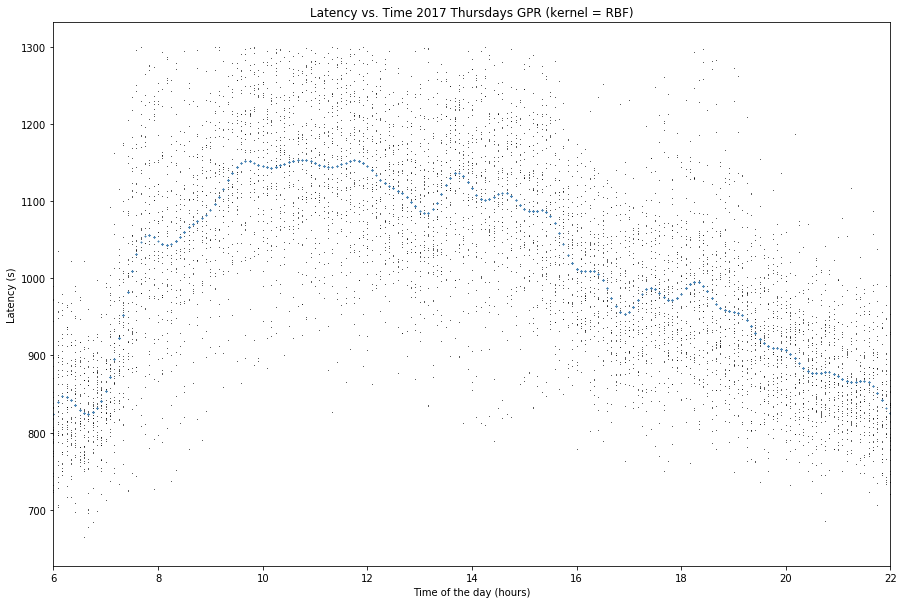

In [23]:
# fig, ax = plt.subplots(1, figsize=(12, 6))
# plt.scatter(features, labels, marker='o', color='black', linewidth=0, s=0.5)
# plt.scatter(X_test, y_pred, marker='x', color='steelblue', s=0.5)
# plt.suptitle("$GaussianProcessRegressor(kernel=RBF)$ [default]", fontsize=20)
# plt.xlim(xmin=6)
# plt.xlim(xmax=22)
# # plt.axis('off')
# plt.show()

plt.figure(figsize=(15,10))
plt.title('Latency vs. Time 2017 Thursdays GPR (kernel = RBF)')
plt.scatter(features, labels, marker='o', color='black', linewidth=0, s=0.5)
plt.scatter(X_test, y_pred, marker='x', color='steelblue', s=0.5)
plt.xlabel('Time of the day (hours)')
plt.ylabel('Latency (s)')
plt.xlim(xmin=6)
plt.xlim(xmax=22)
# plt.axis('off')
plt.show()

In [28]:
test_df = pd.DataFrame({'pred':y_pred})
test_df.describe()

,pred
count,1378.000000
mean,1000.751121
std,113.064652
min,783.312012
25%,896.476074
50%,994.790039
75%,1106.101562
max,1153.320312


In [36]:
test_df['time'] = X_test

In [37]:
test_df.idxmin()
test_df.iloc[[8]]

,pred,time
8,783.312012,NaN


In [24]:
from sklearn.metrics import mean_squared_error

GPR_mse = mean_squared_error(y_test, y_pred)
# GPR_rmse = np.sqrt(tree_mse)
GPR_mse

7799.110930584805

In [25]:
df = pd.read_csv('All_Months_2020.csv')

In [38]:
df.head()
# up_df_thurs = up_df[up_df['Timestamp'].dt.weekday == 3]
# up_df_thurs = up_df_thurs[up_df_thurs['Timestamp'].dt.year == 2017]
# up_df_thurs = up_df_thurs[up_df_thurs['Timestamp'].dt.month < 10]


,Unnamed: 0,1,2,3,4,5,6,7
0,5,2020-01-02 00:00:22,01F0339S,2020-01-02 00:12:19,01F0509S,19.4,Y,2020-01-02 00:00:22+01F0339S; 2020-01-02 00:03...
1,30,2020-01-02 00:01:31,01F0339S,2020-01-02 00:11:50,01F0509S,19.4,Y,2020-01-02 00:01:31+01F0339S; 2020-01-02 00:03...
2,8,2020-01-02 00:01:33,01F0339S,2020-01-02 00:10:58,01F0509S,19.4,Y,2020-01-02 00:01:33+01F0339S; 2020-01-02 00:03...
3,11,2020-01-02 00:03:02,01F0339S,2020-01-02 00:12:20,01F0509S,19.4,Y,2020-01-02 00:03:02+01F0339S; 2020-01-02 00:05...
4,36,2020-01-02 00:03:12,01F0339S,2020-01-02 00:10:19,01F0509S,19.4,Y,2020-01-02 00:03:12+01F0339S; 2020-01-02 00:04...


In [26]:
import re

time_col = df['7']

In [27]:
# Calculate the latencies and time for each row and append it to the array to use for plotting.

latency = []
time_of_the_day = []

for i in range(len(time_col)):
    temp = re.split('[+]', time_col[i])
    t1 = temp[0]
    t2 = re.split('[;]', temp[4])[1]
    t1 = pd.to_datetime(t1)
    t2 = pd.to_datetime(t2)
    diff = pd.Timedelta(t2 - t1).total_seconds()
    latency.append(diff)
    time_of_the_day.append(t1)

In [28]:
date_df = pd.DataFrame({'TimeStamp':time_of_the_day})

time_only = pd.DatetimeIndex(date_df['TimeStamp']).time

# Since the above plot has a lot of noise with latency values greater than a certain threshold (~1500), any latency values greater than 1500 sohuld be removed. 

# Convert the lists into a dataframe to filter out rows which have latency values > 1500.
new_df = pd.DataFrame({'Time':time_only,'Latency':latency})

new_df.drop(new_df[(new_df['Latency']>1300)].index,inplace=True)

# Convert the new dataframe with latencies < 1500 into a list for plotting.

new_time = (new_df['Time'].to_list())
new_latency = (new_df['Latency'].to_list())

# Convert time to time in hours.

time_in_hours = []
for i in range(len(new_time)):
    temp = new_time[i].hour + new_time[i].minute/60
    time_in_hours.append(temp)

In [29]:
new_df.head()

,Time,Latency
0,00:00:22,717.0
1,00:01:31,619.0
2,00:01:33,565.0
3,00:03:02,558.0
4,00:03:12,427.0


In [30]:
date_df['Latency'] = latency

In [31]:
# 5 Minute Average

data1 = date_df.set_index('TimeStamp').resample('5min')['Latency'].mean()

In [32]:
data1.head()

TimeStamp
2020-01-02 00:00:00    565.500000
2020-01-02 00:05:00    606.750000
2020-01-02 00:10:00    558.166667
2020-01-02 00:15:00    622.333333
2020-01-02 00:20:00    570.500000
Freq: 5T, Name: Latency, dtype: float64

In [33]:

time_only = pd.DatetimeIndex(data1.index).time

# Since the above plot has a lot of noise with latency values greater than a certain threshold (~1500), any latency values greater than 1500 sohuld be removed. 

# Convert the lists into a dataframe to filter out rows which have latency values > 1500.
new_df = pd.DataFrame({'Time':time_only,'Latency':data1})

new_df.drop(new_df[(new_df['Latency']>1300)].index,inplace=True)

# Convert the new dataframe with latencies < 1500 into a list for plotting.

new_time = (new_df['Time'].to_list())
new_latency = (new_df['Latency'].to_list())

# Convert time to time in hours.

time_in_hours = []
for i in range(len(new_time)):
    temp = new_time[i].hour + new_time[i].minute/60
    time_in_hours.append(temp)

In [34]:
df_test = new_df
new_df.drop(columns=['Time'],inplace=True)
new_df['Time'] = time_in_hours
new_df.head()

,Latency,Time
TimeStamp,,
2020-01-02 00:00:00,565.500000,0.000000
2020-01-02 00:05:00,606.750000,0.083333
2020-01-02 00:10:00,558.166667,0.166667
2020-01-02 00:15:00,622.333333,0.250000
2020-01-02 00:20:00,570.500000,0.333333


In [35]:
new_df = new_df.reset_index()

In [36]:
new_df.head()

,TimeStamp,Latency,Time
0,2020-01-02 00:00:00,565.500000,0.000000
1,2020-01-02 00:05:00,606.750000,0.083333
2,2020-01-02 00:10:00,558.166667,0.166667
3,2020-01-02 00:15:00,622.333333,0.250000
4,2020-01-02 00:20:00,570.500000,0.333333


In [37]:
# new_df = new_df[(new_df['TimeStamp'] >= '2020-03-01 06:00:00') & (new_df['TimeStamp'] <= '2020-04-01 22:00:00')]

In [38]:
new_df.drop('TimeStamp', axis=1, inplace=True)
new_df.dropna(inplace=True)

In [39]:
new_df.head()

,Latency,Time
0,565.500000,0.000000
1,606.750000,0.083333
2,558.166667,0.166667
3,622.333333,0.250000
4,570.500000,0.333333


In [82]:
# # Since the data is too large for GPR, shrink it by taking the average latencies over every 5 minutes.

# df_test = new_df.rolling(5).mean() 
# df_test = df_test.iloc[::5, :]
# df_test['Time'].size

In [40]:
# Split the data into training and testing datasets
from sklearn.model_selection import train_test_split

features = new_df.drop('Latency',axis=1) # drop labels for training set
labels = new_df["Latency"].copy()

# Use test size as 0.1, because the total dataset is not very large (91684). Therefore, to increase the model's performance, as much data should be used to train the model as possible.

X_train1, X_test1, y_train1, y_test1 = train_test_split(features, labels,test_size=0.2,random_state=41)

X_train.shape

(5508, 1)

In [41]:
y_train1.shape

(8327,)

In [89]:
# # Split the data into training and testing datasets
# from sklearn.model_selection import train_test_split

# features = df_test.drop("Latency", axis=1) # drop labels for training set
# labels = df_test["Latency"].copy()

# # Use test size as 0.1, because the total dataset is not very large (91684). Therefore, to increase the model's performance, as much data should be used to train the model as possible.

# X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.2,random_state=41)

# X_train.shape

In [42]:
# X_train does NOT have any null values
# X_train.isnull().values.any()

# y_train HAS null values. Therefore, need fixing.
# y_train.isnull().values.any()

y_train1.fillna(method='ffill',inplace=True)
y_train1.isnull().values.any()

X_train1.fillna(method='ffill',inplace=True)
X_train1.isnull().values.any()

False

In [43]:
from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# rbf = C(1.0) * RBF(length_scale=1.0)
# clf = GaussianProcessRegressor(kernel=rbf, random_state=41)

# Best fit when using the default RBF kernel
clf = GaussianProcessRegressor(random_state=41)

clf.fit(X_train1, y_train1)
y_pred1 = clf.predict(X_test1)


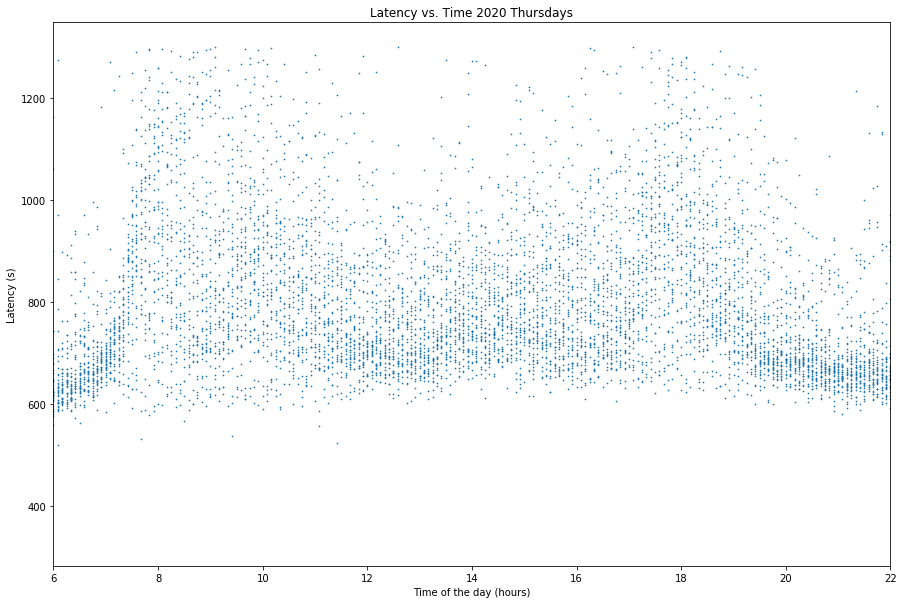

In [44]:
plt.figure(figsize=(15,10))
plt.scatter(time_in_hours, new_latency, marker = 'x', s=0.5)
plt.title('Latency vs. Time 2020 Thursdays')
plt.xlabel('Time of the day (hours)')
plt.ylabel('Latency (s)')
plt.xlim(xmin=6)
plt.xlim(xmax=22)
plt.show()

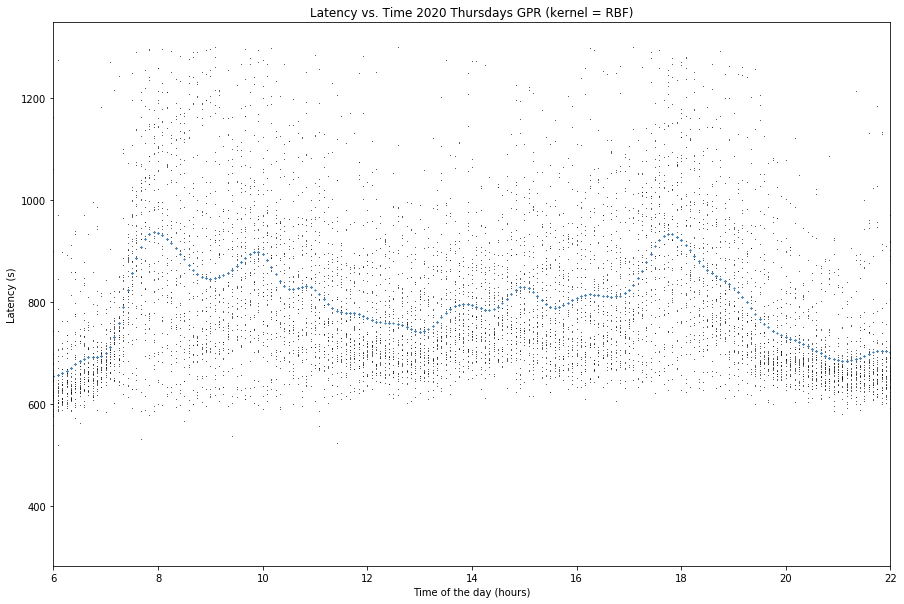

In [45]:
# fig, ax = plt.subplots(1, figsize=(12, 6))
# plt.scatter(features, labels, marker='o', color='black', linewidth=0, s=0.5)
# plt.scatter(X_test, y_pred, marker='x', color='steelblue', s=0.5)
# plt.suptitle("$GaussianProcessRegressor(kernel=RBF)$ [default]", fontsize=20)
# plt.xlim(xmin=6)
# plt.xlim(xmax=22)
# # plt.axis('off')
# plt.show()

plt.figure(figsize=(15,10))
plt.title('Latency vs. Time 2020 Thursdays GPR (kernel = RBF)')
plt.scatter(features, labels, marker='o', color='black', linewidth=0, s=0.5)
plt.scatter(X_test1, y_pred1, marker='x', color='steelblue', s=0.5)
plt.xlabel('Time of the day (hours)')
plt.ylabel('Latency (s)')
plt.xlim(xmin=6)
plt.xlim(xmax=22)
# plt.axis('off')
plt.show()

In [46]:
test_df = pd.DataFrame({'pred':y_pred1})
test_df.describe()

,pred
count,2082.000000
mean,754.975128
std,87.736081
min,622.114105
25%,675.894501
50%,754.607579
75%,823.290710
max,936.314331


In [47]:
test_df['time'] = X_test1

In [48]:
test_df.idxmin()
test_df.iloc[[316]]

,pred,time
316,622.114105,NaN


In [63]:
test_df.idxmax()
test_df.iloc[[242]]

,pred,time
242,936.314331,20.416667


In [49]:
from sklearn.metrics import mean_squared_error

GPR_mse = mean_squared_error(y_test1, y_pred1)
GPR_mse

14575.418392297599

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Latency vs. Time for 2017 and 2020 Thursdays GPR (kernel = RBF)')
plt.scatter(X_test, y_pred, marker='o', color='black', s=0.5)
plt.scatter(X_test1, y_pred1, marker='x', color='steelblue', s=0.5)
plt.xlabel('Time of the day (hours)')
plt.ylabel('Latency (s)')
plt.xlim(xmin=6)
plt.xlim(xmax=22)
# plt.axis('off')
plt.show()